In [7]:

# Loading the Dataset
import pandas as pd

# Replace with your file path
df = pd.read_csv("heart.csv")

# Check data
print(df.head())
print(df.info())






   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

In [9]:
# Spliting into Features (X) and Target (y)
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop("target", axis=1)
y = df["target"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (820, 13)
X_test shape: (205, 13)
y_train shape: (820,)
y_test shape: (205,)


In [10]:
#Training a Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Train the model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Predict
y_pred_tree = tree_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))



Decision Tree Accuracy: 0.9853658536585366


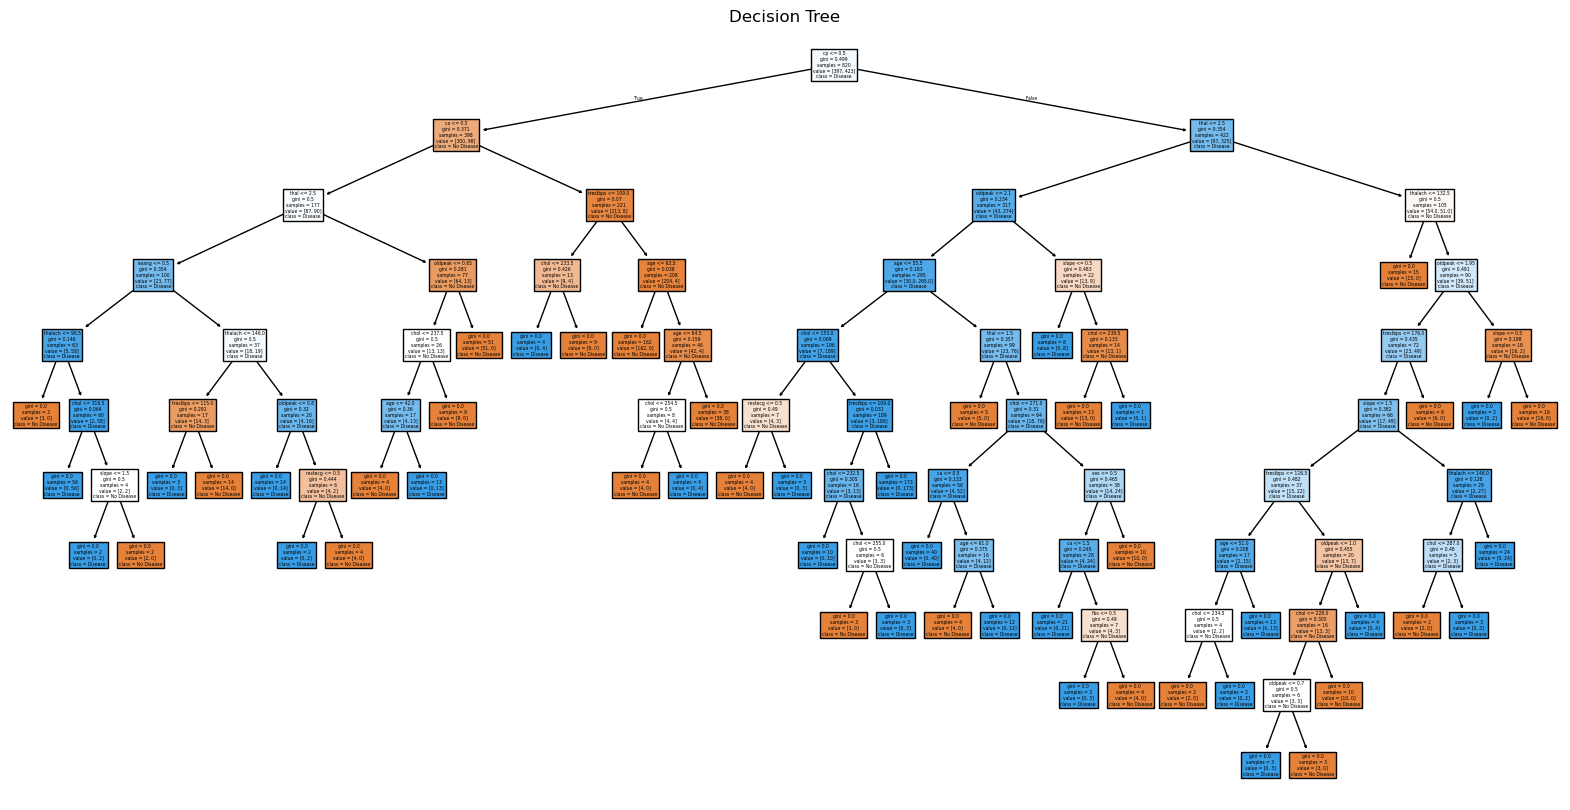

In [18]:
#Visualizing the Tree (with Matplotlib, not Graphviz)
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(tree_model, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.title("Decision Tree")
plt.show()



In [25]:
# Control Tree Depth 
tree_limited = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_limited.fit(X_train, y_train)

y_pred_limited = tree_limited.predict(X_test)
print("Limited Depth Tree Accuracy:", accuracy_score(y_test, y_pred_limited))


print("Train Accuracy (Full Tree):", tree_model.score(X_train, y_train))
print("Test Accuracy (Full Tree):", tree_model.score(X_test, y_test))

print("Train Accuracy (Limited Tree):", tree_limited.score(X_train, y_train))
print("Test Accuracy (Limited Tree):", tree_limited.score(X_test, y_test))



Limited Depth Tree Accuracy: 0.8
Train Accuracy (Full Tree): 1.0
Test Accuracy (Full Tree): 0.9853658536585366
Train Accuracy (Limited Tree): 0.8829268292682927
Test Accuracy (Limited Tree): 0.8


In [26]:
#Training a Random Forest
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

y_pred_forest = forest_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_forest))


Random Forest Accuracy: 0.9853658536585366


In [27]:
#Train a Random Forest and Compare Accuracy
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Training a Random Forest model
forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_forest = forest_model.predict(X_test)

# Accuracy of Random Forest
forest_accuracy = accuracy_score(y_test, y_pred_forest)
print("Random Forest Accuracy:", forest_accuracy)

# Comparing with Decision Tree Accuracy
tree_accuracy = accuracy_score(y_test, tree_model.predict(X_test))
print("Decision Tree Accuracy:", tree_accuracy)


Random Forest Accuracy: 0.9853658536585366
Decision Tree Accuracy: 0.9853658536585366


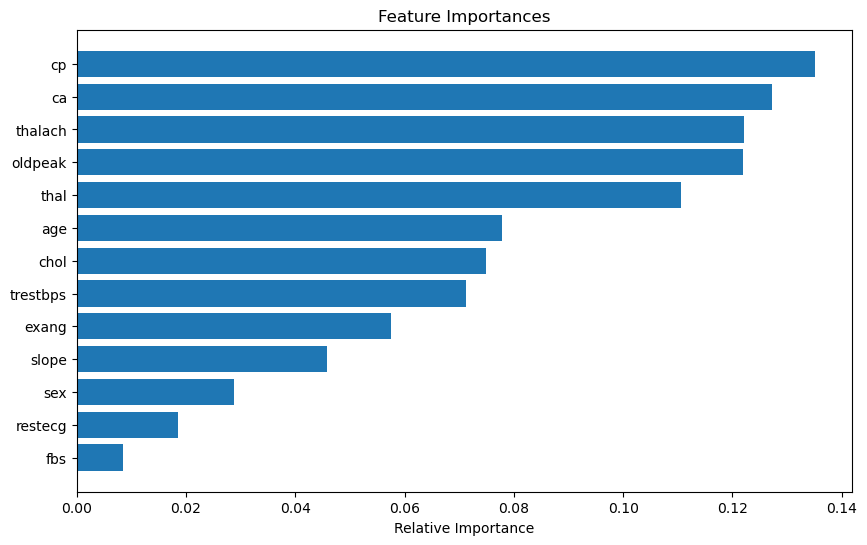

In [28]:
# Feature Importances 
import numpy as np

importances = forest_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


In [29]:
#Cross-Validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(forest_model, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Average CV Score:", scores.mean())


Cross-validation scores: [1.         1.         1.         1.         0.98536585]
Average CV Score: 0.9970731707317073
